In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x=df.drop(columns='Outcome',axis=1)
y=df['Outcome']
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
# x train and y train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)


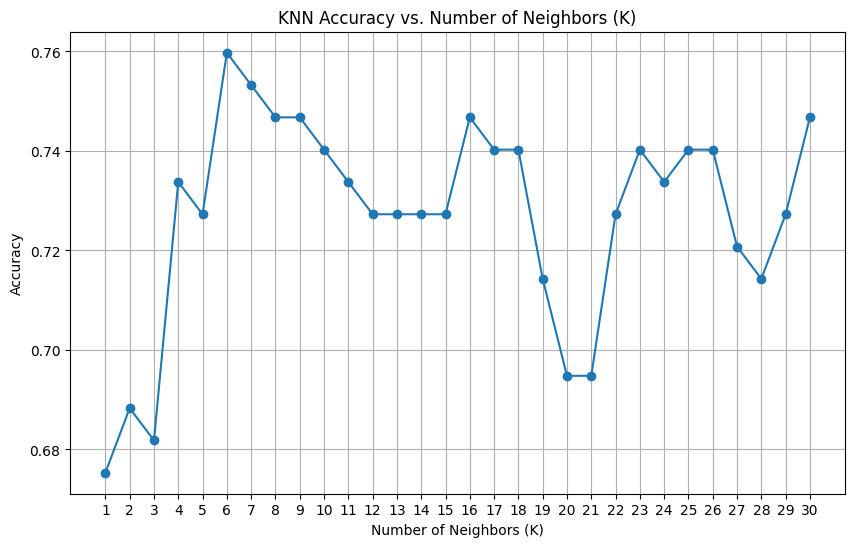

The optimal value of K is: 6


In [ ]:
# prompt: use KNN and find the value of K

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a range of K values to test
k_values = range(1, 31)

# List to store accuracy scores for each K
accuracy_scores = []

# Iterate through each K value
for k in k_values:
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn.fit(x_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(x_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the K value with the highest accuracy
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"The optimal value of K is: {best_k}")


In [ ]:

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)

y_pred_best = best_knn.predict(x_test)

print(classification_report(y_test, y_pred_best))
print(classification_report(y_train, best_knn.predict(x_train)))




              precision    recall  f1-score   support

           0       0.74      0.96      0.84       100
           1       0.84      0.39      0.53        54

    accuracy                           0.76       154
   macro avg       0.79      0.67      0.69       154
weighted avg       0.78      0.76      0.73       154

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       400
           1       0.80      0.54      0.65       214

    accuracy                           0.79       614
   macro avg       0.80      0.73      0.75       614
weighted avg       0.79      0.79      0.78       614

